# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import numpy  as np
import pandas as pd
from graph import Graph #собственный класс для графиков
import rectangular as rect
from matplotlib  import pyplot as plt

## Проверка элементарного УК

In [2]:
def angles(num = 5):
    #зависимость элементарного УК от угла
    c_i = np.array([1/2, 0, 1/2])
    c_j = np.array([1/2, 1, 1/2])
    n_i = np.array([0,1,0])
    angle_ar = np.linspace(0,1,num)*np.pi
    
    x, y = np.sin(angle_ar), np.cos(angle_ar)
    Y    = []
    for i in range(num):
        n_j = [x[i], y[i], 0]
        X   = angle_ar/np.pi
        Y.append(rect.elementary(c_i,c_j,n_i,n_j,0.05))
    
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от угла", "Угол, rad/pi")
    plt.plot(X,Y)
    graph.save("angle.png", "tests")
    return

def distance(num = 5):
    #зависимость  элем-го УК от расстояния
    c_i  = np.array([1/2, 0, 1/2])
    #n_i и n_j "смотрят" друг на друга
    n_i  = np.array([0,-1,0])
    n_j  = np.array([np.sin(np.pi/4), np.cos(np.pi/4),0])
    dist = np.linspace(0.5,10,num)
    Y    = []
    for d in dist:
        c_j = np.array([1/2, d, 1/2])
        Y.append(rect.elementary(c_i,c_j,n_i,n_j,0.05))
        
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от расстояния", "Расстояние")
    plt.plot(dist,Y)
    graph.save("distance.png", "tests")
    return

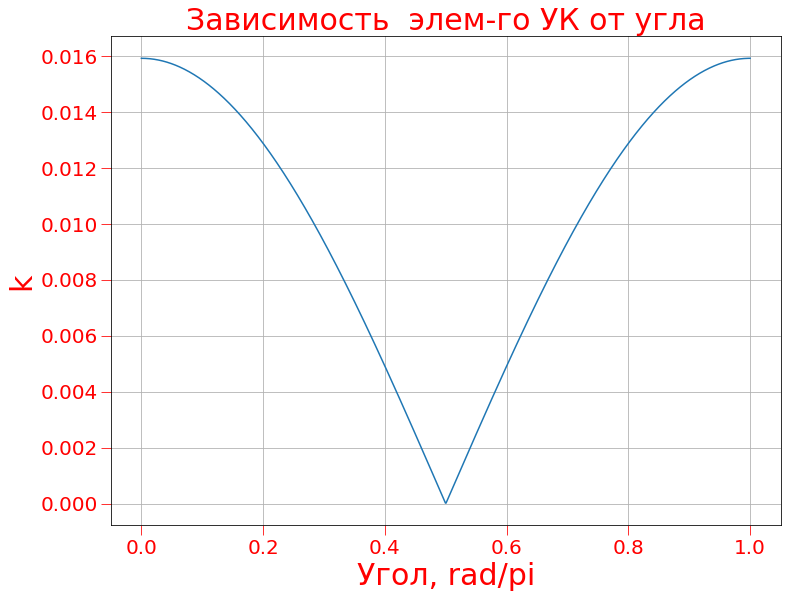

In [3]:
angles(1002)

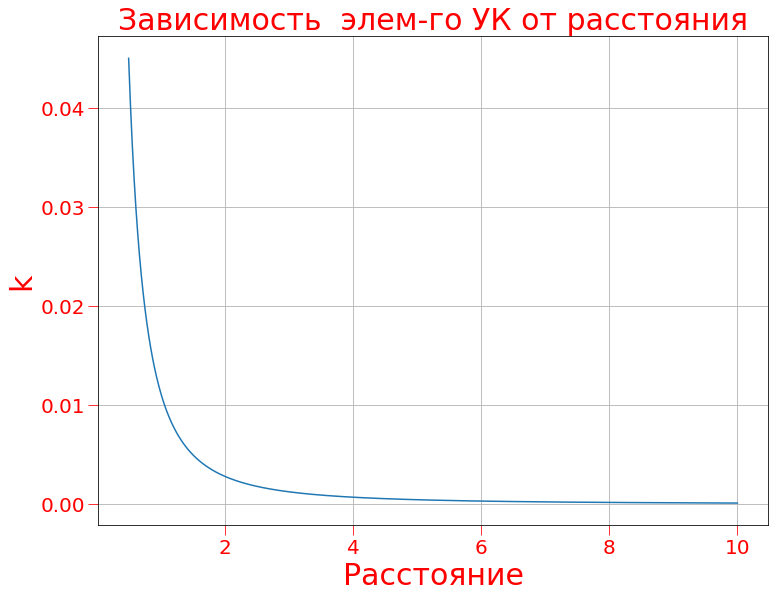

In [4]:
distance(1000)

## Проверка УК

In [5]:
def table(phi):
    #вывод всех пар УК.
    #phi_ij находится в i-й строке, j-м столбце.
    new_phi = np.transpose(phi)
    my_table = pd.DataFrame({"0" : new_phi[0]})
    for i in range(1,len(new_phi)):
        my_table[str(i)] = new_phi[i]
    return my_table

def mutuality(t, phi):
    #свойство взаимности.
    for i in range(1, len(phi)):
        for j in range(1, len(phi[i])):
            if round(phi[i][j] * t.areas[i-1],5) != round(phi[j][i] * t.areas[j-1],5):
                print("Свойство взаимности не выполнено для i =", i, "и j =", j)
    print("Проверка взаимности a =", t.a, "b =", t.b, "площади ячейки =", t.cell, "закончена")
    print("\n")   
    return

def additivity(t, phi):
    #свойство аддитивности.
    for i in range(1,len(phi)):
        for j in range(1,len(phi[i])):
            if i == j:
                break
            new_phi = t.check_add(i,j)
            if round(new_phi,5) != round(phi[i][j],5):
                print("Свойство аддитивности не выполнено для i=", i, "и для j=", j)
    print("Проверка аддитивности для a =", t.a, "b =", t.b, "площади ячейки =", t.cell, "закончена")
    print("\n")
    return 

In [6]:
def isolation(t, phi):
    #свойство замкнутости.
    for i in range(1,len(phi)):
        sum = 0
        for j in range(1, len(phi[i])):
            sum += phi[i][j]
        print("Сумма для " + str(i) + "-го эмиттера равна", round(sum,5), "cells =", t.num_of_cells(i))
    return

In [7]:
tube_1, tube_2 = rect.Tube(1,1,1,0.0025), rect.Tube(1,5,1,0.0025)

phi_1 = tube_1.matrix()

In [8]:
print("Для a = 1, b = 1, L = 1, step =", np.sqrt(tube_1.cell))
display(table(phi_1))

Для a = 1, b = 1, L = 1, step = 0.05


,0,1,2,3,4,5,6
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.199976,0.206777,0.206777,0.206777,0.206777
2,0.0,0.199976,0.000000,0.206777,0.206777,0.206777,0.206777
3,0.0,0.206777,0.206777,0.000000,0.206777,0.199976,0.206777
4,0.0,0.206777,0.206777,0.206777,0.000000,0.206777,0.199976
5,0.0,0.206777,0.206777,0.199976,0.206777,0.000000,0.206777
6,0.0,0.206777,0.206777,0.206777,0.199976,0.206777,0.000000


In [9]:
isolation(tube_1, phi_1)

Сумма для 1-го эмиттера равна 1.02709 cells = 400
Сумма для 2-го эмиттера равна 1.02709 cells = 400
Сумма для 3-го эмиттера равна 1.02709 cells = 400
Сумма для 4-го эмиттера равна 1.02709 cells = 400
Сумма для 5-го эмиттера равна 1.02709 cells = 400
Сумма для 6-го эмиттера равна 1.02709 cells = 400


In [10]:
print("Для a = 1, b = 5, L = 1, step =", np.sqrt(tube_1.cell))
phi_2 = tube_2.matrix()
display(table(phi_2))

Для a = 1, b = 5, L = 1, step = 0.05


,0,1,2,3,4,5,6
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.359309,0.050729,0.277746,0.050729,0.277746
2,0.0,0.359309,0.000000,0.050729,0.277746,0.050729,0.277746
3,0.0,0.253644,0.253644,0.000000,0.253644,0.012405,0.253644
4,0.0,0.277746,0.277746,0.050729,0.000000,0.050729,0.359309
5,0.0,0.253644,0.253644,0.012405,0.253644,0.000000,0.253644
6,0.0,0.277746,0.277746,0.050729,0.359309,0.050729,0.000000


In [11]:
isolation(tube_2, phi_2)

Сумма для 1-го эмиттера равна 1.01626 cells = 2000
Сумма для 2-го эмиттера равна 1.01626 cells = 2000
Сумма для 3-го эмиттера равна 1.02698 cells = 400
Сумма для 4-го эмиттера равна 1.01626 cells = 2000
Сумма для 5-го эмиттера равна 1.02698 cells = 400
Сумма для 6-го эмиттера равна 1.01626 cells = 2000


In [12]:
mutuality(tube_1, phi_1)
mutuality(tube_2, phi_2)

Проверка взаимности a = 1 b = 1 площади ячейки = 0.0025 закончена


Проверка взаимности a = 1 b = 5 площади ячейки = 0.0025 закончена




In [13]:
additivity(tube_1, phi_1)
additivity(tube_2, phi_2)

Проверка аддитивности для a = 1 b = 1 площади ячейки = 0.0025 закончена


Проверка аддитивности для a = 1 b = 5 площади ячейки = 0.0025 закончена




## Проверка коэффициента Клаузинга

In [14]:
def test_1(phi):
    #меньше ли 1.
    print("Коэффициент Клаузинга меньше единицы", rect.clausing(phi) <= 1)
    print("\n")
    return

def test_0(phi):
    #больше ли 0.
    print("Коэффициент Клаузинга больше нуля", rect.clausing(phi) >= 0)
    print("\n")
    return

In [15]:
test_1(phi_1)
test_1(phi_2)

Коэффициент Клаузинга меньше единицы True


Коэффициент Клаузинга меньше единицы True




In [16]:
test_0(phi_1)
test_0(phi_2)

Коэффициент Клаузинга больше нуля True


Коэффициент Клаузинга больше нуля True




## Вывод

### Потоки

In [17]:
def print_flows(t, phi):
    print("Для a =", t.a, "b =", t.b, "L =", t.L, "step =", np.sqrt(t.cell))
    q = rect.flows(phi)
    if rect.check_solution(phi,q):
        print("Cистема решена верно \n")
    else:
        print("Ситема решена неверно")
        return
    print("")
    print("Поток, покидающий 1-ю  грань равен", round(q[0],5), "cells =", t.num_of_cells(1))
    print("Поток, покидающий 2-ю  грань равен", 0            , "cells =", t.num_of_cells(2))
    print("Поток, покидающий 3-ю  грань равен", round(q[1],5), "cells =", t.num_of_cells(3))
    print("Поток, покидающий 4-ю  грань равен", round(q[2],5), "cells =", t.num_of_cells(4))
    print("Поток, покидающий 5-ю  грань равен", round(q[1],5), "cells =", t.num_of_cells(5))
    print("Поток, покидающий 6-ю  грань равен", round(q[2],5), "cells =", t.num_of_cells(6))
    return

In [18]:
print_flows(tube_1, phi_1)

Для a = 1 b = 1 L = 1 step = 0.05
Cистема решена верно 


Поток, покидающий 1-ю  грань равен 1.0 cells = 400
Поток, покидающий 2-ю  грань равен 0 cells = 400
Поток, покидающий 3-ю  грань равен 0.53504 cells = 400
Поток, покидающий 4-ю  грань равен 0.53504 cells = 400
Поток, покидающий 5-ю  грань равен 0.53504 cells = 400
Поток, покидающий 6-ю  грань равен 0.53504 cells = 400


In [19]:
print_flows(tube_2, phi_2)

Для a = 1 b = 5 L = 1 step = 0.05
Cистема решена верно 


Поток, покидающий 1-ю  грань равен 1.0 cells = 2000
Поток, покидающий 2-ю  грань равен 0 cells = 2000
Поток, покидающий 3-ю  грань равен 0.10439 cells = 400
Поток, покидающий 4-ю  грань равен 0.51617 cells = 2000
Поток, покидающий 5-ю  грань равен 0.10439 cells = 400
Поток, покидающий 6-ю  грань равен 0.51617 cells = 2000
